1. Setup and Load Data

In [1]:
# 1.1 Install dependencies and setup
!pip install opencv-python matplotlib

In [40]:
import tensorflow as tf
import os

In [41]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
# 1.2 Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [43]:
data_dir = 'data'

In [44]:
image_exts = ['jpeg','jpg','bmp','png']

In [45]:
os.listdir(data_dir)
#os.list(os.path.join(data_dir, image_class))

['happy', 'sad']

In [46]:
for image_class in os.listdir(data_dir):
    # https://stackoverflow.com/questions/45093911/oserror-errno-20-not-a-directory-ds-store
    !find . -name "*.DS_Store" -type f -delete # Mac os need
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

happy-people-secrets.jpg
e162ccda8ce0f197f8863f327add9233.jpg
05-12-21-happy-people.jpg
happy.jpg
170404-happy-workers-feature.jpg
friends-happy-190821.jpg
stock-photo-group-of-happy-people-isolated-over-white-background-102307264.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
happy-people-13772392.jpg
613k1XcpYCL._SL1200_.jpg
image14.jpeg
young-and-happy-people-vector-15114154.jpg
happy-people-1024x768.jpeg
Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg
group-5.jpg
8.jpg
image19.jpeg
1961997_stock-photo-group-of-happy-people.jpg
tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg
happy-people-14410042.jpg
happiness.jpg
maxresdefault.jpg
HAPPY-PEOPLE-CLUB-LOGO.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
image12.jpeg
GettyImages-871518740.jpg
105846315-makeit_04082019_bajuelos_jon_haidt_happiness_v2.00_03_34_04.still001.jpg
wallpaper-beach-happy-people.jpg
R.E.M._-_Shiny_Happy_People.jpg
happy-people-6075804.jpg
1HEoLBLidT2u4

In [47]:
img = cv2.imread(os.path.join('data','happy','8.jpg'))

In [48]:
img.shape

(480, 852, 3)

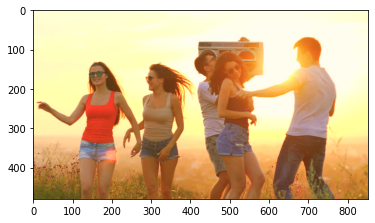

In [49]:
# OpenCV read as BGR 
#plt.imshow(img)
# Color version
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
for image_class in os.listdir(data_dir):
    #!find . -name "*.DS_Store" -type f -delete
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
            # os.remove (image_path)

In [51]:
# 1.3 Load data
tf.data.Dataset??

In [52]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
tf.keras.utils.image_dataset_from_directory??

In [54]:
# Build data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 145 files belonging to 2 classes.


In [55]:
# Allow accessing to the generator from the data pipeline
data_iterator = data.as_numpy_iterator()

In [56]:
data_iterator

In [57]:
# Access data pipeline itself 
# Get another batch from other iterator
batch = data_iterator.next()

In [58]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [59]:
# Class 0 = Happy people
# Class 1 = Sad people
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

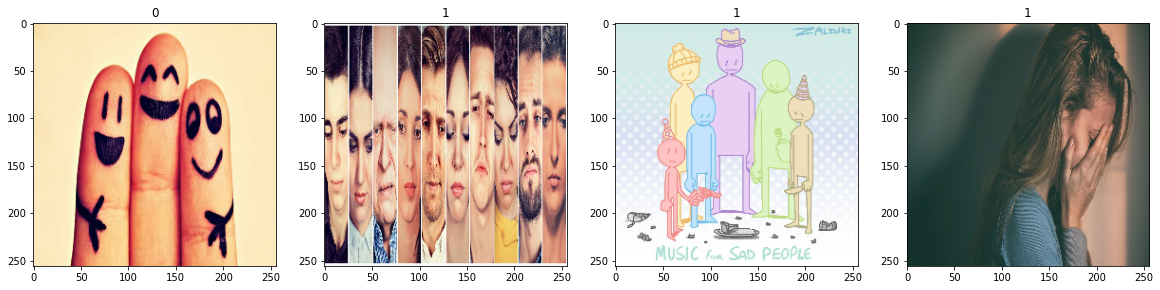

In [60]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [61]:
scaled = batch[0] / 255

In [62]:
scaled.min()

0.0

In [63]:
scaled.max()

1.0

2. Preprocess data

In [64]:
# 2.1 Sacle data
data = data.map(lambda x,y: (x/255, y))

In [65]:
scaled_iterator = data.as_numpy_iterator()

In [131]:
batch = scaled_iterator.next()

In [132]:
batch

(array([[[[0.0895135 , 0.09343507, 0.07382723],
          [0.08290441, 0.08682598, 0.06721814],
          [0.06901807, 0.07293964, 0.0533318 ],
          ...,
          [0.04873304, 0.04873304, 0.04873304],
          [0.04480968, 0.03696654, 0.04088811],
          [0.04289126, 0.03504812, 0.03896969]],
 
         [[0.08383388, 0.08775545, 0.06814761],
          [0.0821389 , 0.08606046, 0.06645262],
          [0.07707382, 0.08099539, 0.06138755],
          ...,
          [0.03174786, 0.03174786, 0.03174786],
          [0.03252103, 0.02467789, 0.02859946],
          [0.03099724, 0.02315411, 0.02707567]],
 
         [[0.07195159, 0.07263327, 0.0627451 ],
          [0.07687653, 0.07755821, 0.06767004],
          [0.08167126, 0.08235294, 0.07246476],
          ...,
          [0.01786918, 0.01786918, 0.01786918],
          [0.0209712 , 0.01960784, 0.02028952],
          [0.0209712 , 0.01960784, 0.02028952]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [133]:
batch[0].max()

1.0

In [134]:
batch[0].min()

0.0

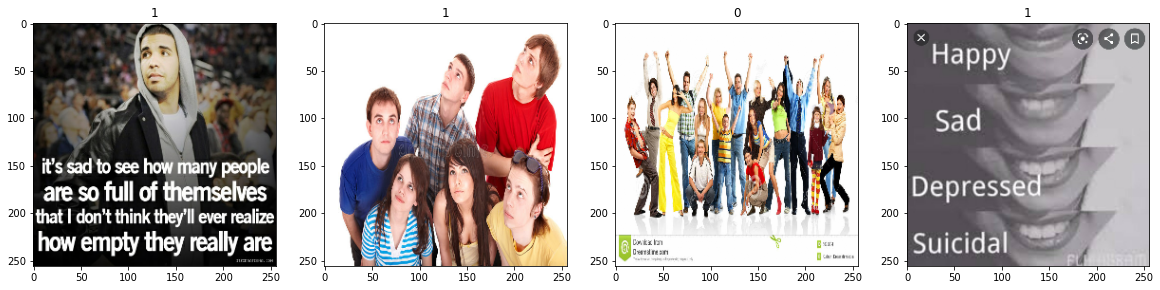

In [135]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [74]:
len(data)

5

In [75]:
# 2.2 Split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
print(train_size, val_size, test_size)

3 1 1


In [76]:
train_size + val_size + test_size

5

In [77]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

3. Deep Model

In [78]:
# 3.1 Build deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Conv2D: convolutional neutal network layer
# MaxPooling2D: condensing layer
# Flatten: flatten layer
# Dropout: regularization

In [79]:
model = Sequential()

In [80]:
# Add convolutional layer and max pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [83]:
# 3.2 Train
logdir='logs'

In [85]:
# Save model at a checkpoint
tensorflowboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [86]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorflowboard_callback])

Epoch 1/20


2022-07-06 13:49:32.803742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 2.1291 - accuracy: 0.5104

2022-07-06 13:49:36.393200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 5s 641ms/step - loss: 2.1291 - accuracy: 0.5104 - val_loss: 1.4097 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 2s 576ms/step - loss: 1.1391 - accuracy: 0.4792 - val_loss: 0.7242 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 2s 592ms/step - loss: 0.6622 - accuracy: 0.5938 - val_loss: 0.5778 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 2s 579ms/step - loss: 0.6072 - accuracy: 0.7396 - val_loss: 0.5030 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 2s 606ms/step - loss: 0.5500 - accuracy: 0.6771 - val_loss: 0.4814 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 2s 592ms/step - loss: 0.4924 - accuracy: 0.7604 - val_loss: 0.4274 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 2s 599ms/step - loss: 0.5158 - accuracy: 0.7812 - val_loss: 0.4304 - val_accuracy: 0.8438
Epoch 8/20
3/3 [===============

In [87]:
hist.history

{'loss': [2.129131317138672,
  1.1391314268112183,
  0.662225604057312,
  0.6072192788124084,
  0.5499871373176575,
  0.4923505187034607,
  0.5158162117004395,
  0.40801459550857544,
  0.3662010431289673,
  0.3416929244995117,
  0.32914310693740845,
  0.27432936429977417,
  0.22685444355010986,
  0.22744505107402802,
  0.202462837100029,
  0.18911080062389374,
  0.15098325908184052,
  0.11348672211170197,
  0.08170241117477417,
  0.09339272975921631],
 'accuracy': [0.5104166865348816,
  0.4791666865348816,
  0.59375,
  0.7395833730697632,
  0.6770833730697632,
  0.7604166865348816,
  0.78125,
  0.8645833730697632,
  0.8541666865348816,
  0.875,
  0.8541666865348816,
  0.8958333730697632,
  0.9270833730697632,
  0.9270833730697632,
  0.90625,
  0.9583333730697632,
  0.9583333730697632,
  0.9583333730697632,
  0.96875,
  0.96875],
 'val_loss': [1.4097132682800293,
  0.724193811416626,
  0.5777744054794312,
  0.5029962062835693,
  0.48143744468688965,
  0.4274241328239441,
  0.43044126033

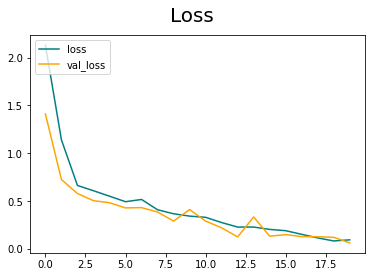

In [91]:
# 3.3 Plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

If the validation loss is rising up, that is an indication that your model may be overfitting. It might need to apply regularisation or change some data.

If the loss is not decreasing or going weird, that should look at the training data. Maybe potentially consider a larger neural network or a more sophisticated neural network.

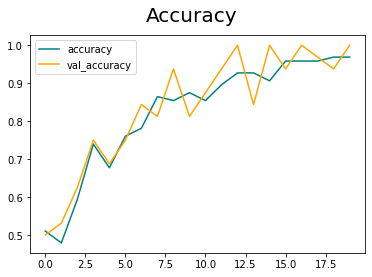

In [136]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate performance

In [156]:
# 4.1 Evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [157]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [158]:
len(test)

1

In [159]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 58ms/step


In [160]:
print(f'Precisions:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precisions:1.0, Recall:0.9090909361839294, Accuracy:0.9411764740943909


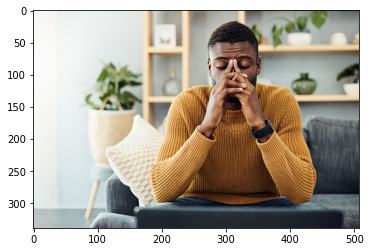

In [185]:
# 4.2 Test
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

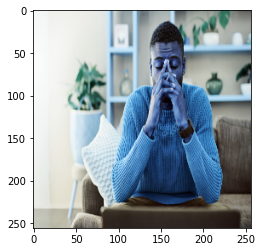

In [186]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [187]:
resize.shape

TensorShape([256, 256, 3])

In [188]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [189]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 126ms/step


In [190]:
yhat

array([[0.5501783]], dtype=float32)

In [191]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


5. Save the Model

In [192]:
# 5.1 Save the model
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'happysadmodel.h5'))

In [194]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [198]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))
print(yhatnew)

1/1 [==============================] - 0s 174ms/step
[[0.5501783]]


In [199]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
